In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(root_mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(root_mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    

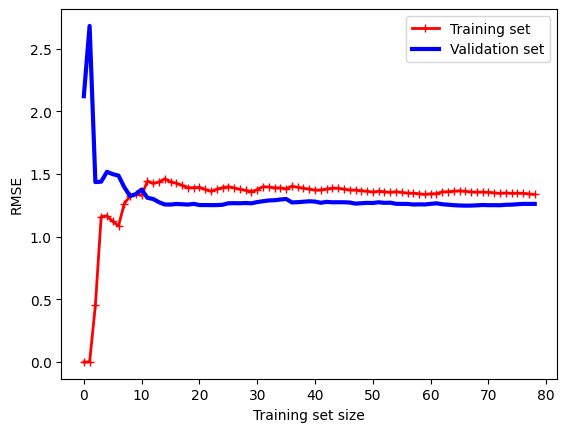

In [4]:
plot_learning_curve(LinearRegression(), X, y)

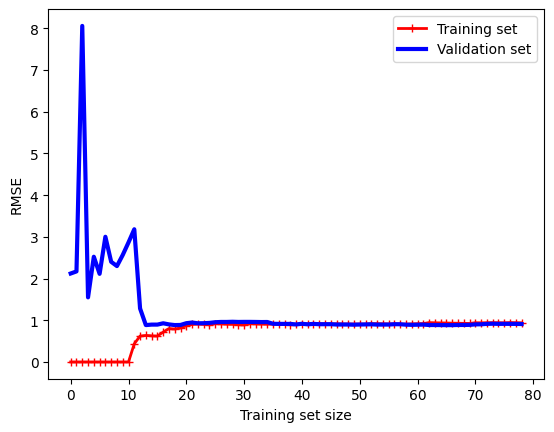

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curve(polynomial_regression, X, y)

#  There is a gap between the curves. This means that the model performs signifi‐
# cantly better on the training data than on the validation data, which is the hall‐
# mark of an overfitting model. However, if you used a much larger training set,
# the two curves would continue to get closer.

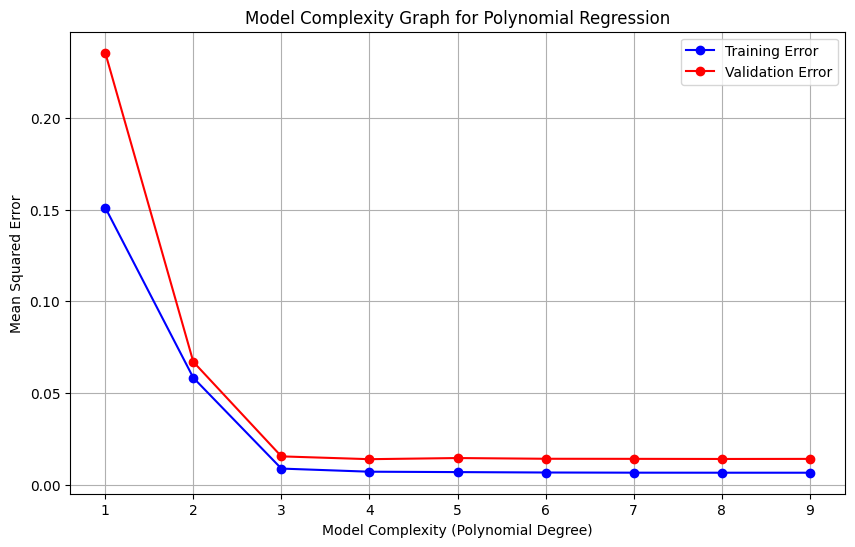

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 1. Setup dummy data
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Define range of complexity (Tree Depth)
# depths = range(1, 15)
train_errors, test_errors = [], []

# for d in depths:
#     model = DecisionTreeRegressor(max_depth=d)
#     model.fit(X_train, y_train)
    
#     # Predict and calculate MSE
#     train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
#     test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

# # 3. Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(depths, train_errors, label='Training Error', color='blue', marker='o')
# plt.plot(depths, test_errors, label='Validation Error', color='red', marker='o')
# plt.xlabel('Model Complexity (Max Depth)')
# plt.ylabel('Mean Squared Error')
# plt.title('Model Complexity Graph')
# plt.legend()
# plt.grid(True)
# plt.show()

degrees = range(1, 10)
for degree in degrees:
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])
    model.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', color='blue', marker='o')
plt.plot(degrees, test_errors, label='Validation Error', color='red', marker='o')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity Graph for Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

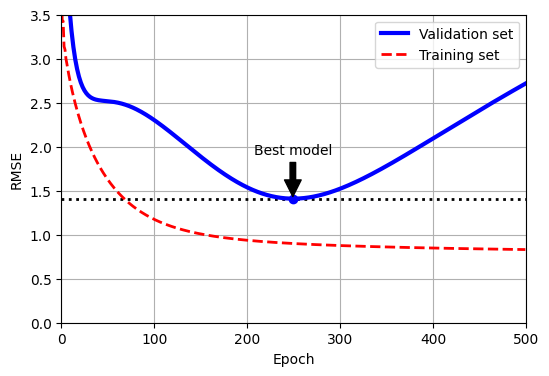

In [7]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import root_mean_squared_error

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
# save_fig("early_stopping_plot")
plt.show()


## Logistic Regression

In [8]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [9]:
iris['data'][: 5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['Target Name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head(30)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Target Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

iris = datasets.load_iris(as_frame=True)

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)



,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

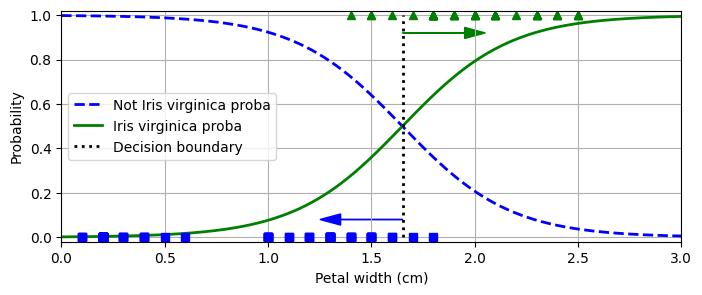

In [12]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()


plt.show()

In [13]:
X_new.shape

(1000, 1)

In [14]:
y_proba

array([[0.99820801, 0.00179199],
       [0.99818732, 0.00181268],
       [0.99816638, 0.00183362],
       ...,
       [0.00578965, 0.99421035],
       [0.00572381, 0.99427619],
       [0.00565872, 0.99434128]], shape=(1000, 2))

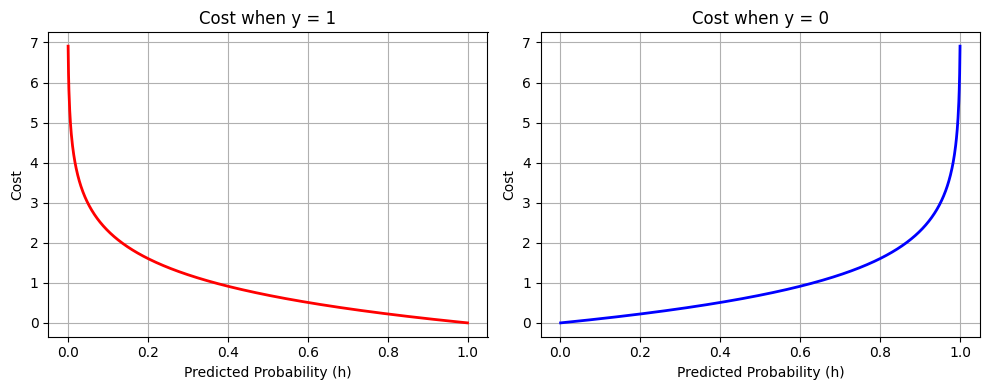

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate values
h = np.linspace(0.001, 0.999, 1000)  # Predicted probabilities

# Cost when y=1
cost_y1 = -np.log(h)

# Cost when y=0
cost_y0 = -np.log(1 - h)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(h, cost_y1, 'r-', linewidth=2)
plt.xlabel('Predicted Probability (h)')
plt.ylabel('Cost')
plt.title('Cost when y = 1')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(h, cost_y0, 'b-', linewidth=2)
plt.xlabel('Predicted Probability (h)')
plt.ylabel('Cost')
plt.title('Cost when y = 0')
plt.grid(True)

plt.tight_layout()
plt.show()

=== CUSTOM LOGISTIC REGRESSION ===
Accuracy: 0.9266666666666666
Theta (parameters): [-0.69098346  0.85468044  4.07819874]

=== SKLEARN LOGISTIC REGRESSION ===
Accuracy: 0.93
Theta (parameters): [-0.55725671  0.67616134  3.39366599]



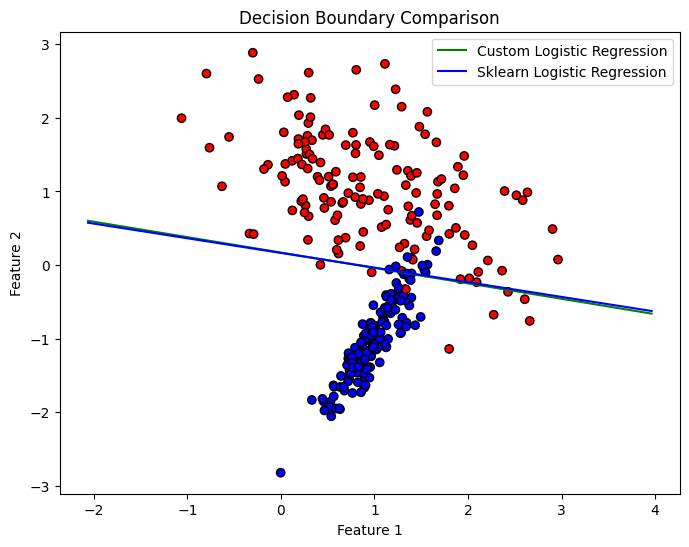

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression as SkLogReg


# =============================================================
#   YOUR LOGISTIC REGRESSION CLASS (clean version)
# =============================================================

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.cost = []

    def _add_intercept(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_log_loss(self, X, y):
        m = X.shape[0]
        z = X @ self.theta
        p = self._sigmoid(z)
        p = np.clip(p, 1e-15, 1 - 1e-15)
        return -(1/m) * np.sum(y*np.log(p) + (1-y)*np.log(1-p))

    def _compute_gradient(self, X, y):
        m = X.shape[0]
        p = self._sigmoid(X.dot(self.theta))
        error = p - y
        return (1/m) * X.T.dot(error)

    def fit(self, X, y):
        X = self._add_intercept(X)
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.n_iterations):
            gradients = self._compute_gradient(X, y)
            self.theta -= self.learning_rate * gradients
            self.cost.append(self._compute_log_loss(X, y))

        return self.theta

    def predict_proba(self, X):
        X = self._add_intercept(X)
        return self._sigmoid(X.dot(self.theta))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)



# =============================================================
#   GENERATE SYNTHETIC BINARY CLASSIFICATION DATA
# =============================================================

X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# =============================================================
#   TRAIN YOUR CUSTOM LOGISTIC REGRESSION
# =============================================================

custom_model = LogisticRegression(learning_rate=0.1, n_iterations=3000)
custom_model.fit(X, y)
y_pred_custom = custom_model.predict(X)
custom_accuracy = np.mean(y_pred_custom == y)

print("=== CUSTOM LOGISTIC REGRESSION ===")
print("Accuracy:", custom_accuracy)
print("Theta (parameters):", custom_model.theta)
print()


# =============================================================
#   TRAIN SKLEARN LOGISTIC REGRESSION (no regularization)
# =============================================================

sk_model = SkLogReg()
sk_model.fit(X, y)
y_pred_sk = sk_model.predict(X)
sk_accuracy = np.mean(y_pred_sk == y)

theta_sklearn = np.r_[sk_model.intercept_, sk_model.coef_.flatten()]

print("=== SKLEARN LOGISTIC REGRESSION ===")
print("Accuracy:", sk_accuracy)
print("Theta (parameters):", theta_sklearn)
print()


# =============================================================
#   VISUALIZE DECISION BOUNDARY
# =============================================================

def plot_decision_boundary(theta, label, color):
    x_vals = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])
    y_vals = -(theta[0] + theta[1]*x_vals) / theta[2]
    plt.plot(x_vals, y_vals, color=color, label=label)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')

plot_decision_boundary(custom_model.theta, "Custom Logistic Regression", "green")
plot_decision_boundary(theta_sklearn, "Sklearn Logistic Regression", "blue")

plt.legend()
plt.title("Decision Boundary Comparison")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
